### Problem Statement:

You have a telecom firm which has collected data of all its customers. The main types of attributes are:

- Demographics (age, gender etc.)
- Services availed (internet packs purchased, special offers taken etc.)
- Expenses (amount of recharge done per month etc.)

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("max.columns", None)

### Loading the data

In [3]:
churn_data = pd.read_csv("/Users/manmitha_malineni/Downloads/churn_data.csv")
internet_data = pd.read_csv("/Users/manmitha_malineni/Downloads/internet_data.csv")
customer_data = pd.read_csv("/Users/manmitha_malineni/Downloads/customer_data.csv")

### Merging Data Sources

In [4]:
churn_data

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
temp = churn_data.merge(internet_data, how = "inner", on = "customerID")
merged_data = temp.merge(customer_data, how = "inner", on = "customerID")

### Inspecting DataSet

In [6]:
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [7]:
merged_data.shape

(7043, 21)

In [8]:
merged_data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [9]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


There are no missing values in the data

### Variable Transformation

In [10]:
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No,Female,0,No,No


In [11]:
merged_data["TotalCharges"] = pd.to_numeric(merged_data["TotalCharges"], errors="coerce" )

### Missing values

In [12]:
merged_data.isnull().sum().sort_values(ascending = False)

TotalCharges        11
customerID           0
OnlineSecurity       0
Partner              0
SeniorCitizen        0
gender               0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
OnlineBackup         0
InternetService      0
tenure               0
MultipleLines        0
Churn                0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
PhoneService         0
Dependents           0
dtype: int64

Since the number of missing values in the column are less, dropping the rows

In [13]:
merged_data = merged_data[ ~ merged_data["TotalCharges"].isnull()]

In [14]:
merged_data.shape

(7032, 21)

### EDA

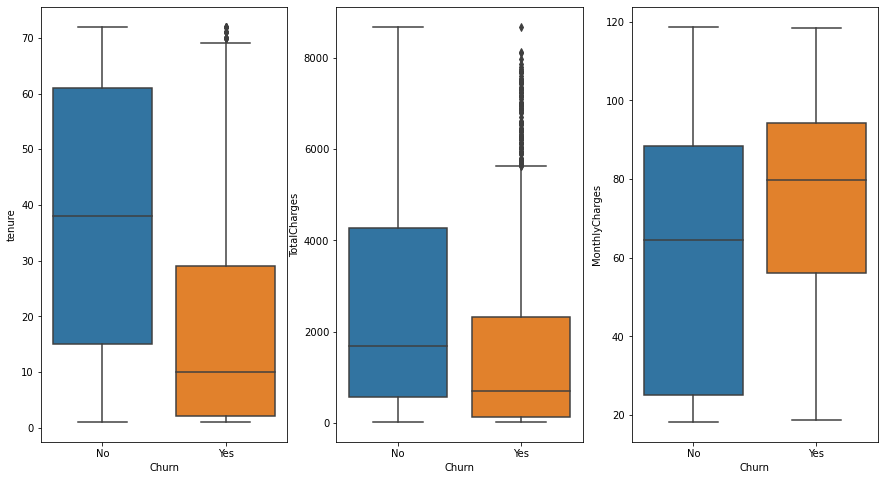

In [15]:
numeric_cols = ["tenure", "TotalCharges", "MonthlyCharges"]
#sns.pairplot(merged_data, x_vars= numeric_cols, y_vars= ["Churn"], kind = "box")
index = 1
plt.figure(figsize=(15,8))
for column in numeric_cols:
    plt.subplot(1,3, index)
    sns.boxplot(merged_data["Churn"], merged_data[column])
    index+=1
plt.show()

In [16]:
### checking for the distribution of columns.
cat_columns = list(merged_data.columns[(merged_data.dtypes == object)])
cat_columns.remove("customerID")
cat_columns

['PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'gender',
 'Partner',
 'Dependents']

In [17]:
merged_data[cat_columns]

,PhoneService,Contract,PaperlessBilling,PaymentMethod,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,Partner,Dependents
0,No,Month-to-month,Yes,Electronic check,No,No phone service,DSL,No,Yes,No,No,No,No,Female,Yes,No
1,Yes,One year,No,Mailed check,No,No,DSL,Yes,No,Yes,No,No,No,Male,No,No
2,Yes,Month-to-month,Yes,Mailed check,Yes,No,DSL,Yes,Yes,No,No,No,No,Male,No,No
3,No,One year,No,Bank transfer (automatic),No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Male,No,No
4,Yes,Month-to-month,Yes,Electronic check,Yes,No,Fiber optic,No,No,No,No,No,No,Female,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,One year,Yes,Mailed check,No,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Male,Yes,Yes
7039,Yes,One year,Yes,Credit card (automatic),No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Female,Yes,Yes
7040,No,Month-to-month,Yes,Electronic check,No,No phone service,DSL,Yes,No,No,No,No,No,Female,Yes,Yes
7041,Yes,Month-to-month,Yes,Mailed check,Yes,Yes,Fiber optic,No,No,No,No,No,No,Male,Yes,No


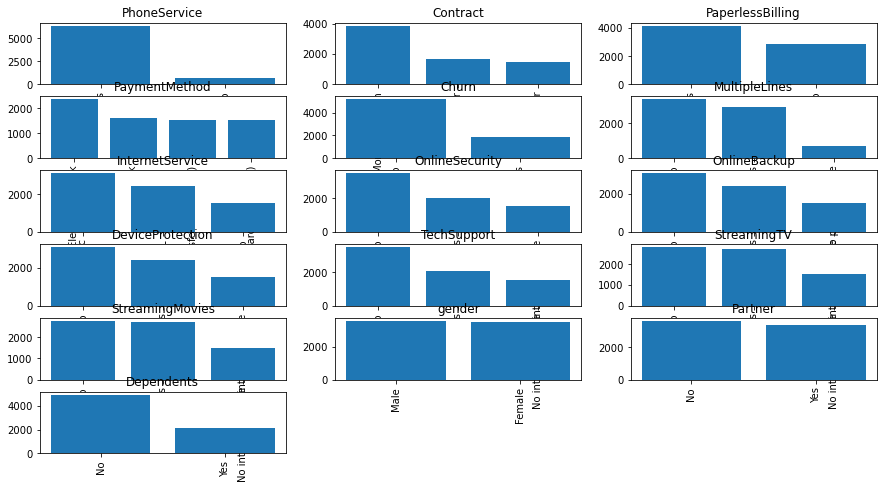

In [18]:
fig = plt.figure(figsize=(15,12))
index = 1
for column in cat_columns:
    plt.subplot(9,3, index)
    index+=1 
    temp = merged_data[column].value_counts()
    plt.bar(temp.index, temp)
    plt.title(column)
    plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

In [19]:
### Checking for data imbalance
merged_data["Churn"].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

### One-Hot encoding.


In [20]:
binary_cols = ["PhoneService", "PaperlessBilling", "Churn", "Partner", "Dependents"]

In [21]:
merged_data[binary_cols] = merged_data[binary_cols].apply(lambda x: x.map({"Yes": 1, "No": 0}))
merged_data["gender"]= merged_data["gender"].map({"Male": 1, "Female": 0})

In [22]:
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,No,DSL,Yes,No,Yes,No,No,No,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,DSL,Yes,Yes,No,No,No,No,1,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,No,Fiber optic,No,No,No,No,No,No,0,0,0,0


In [23]:
columns = ["OnlineSecurity", "OnlineBackup", "DeviceProtection",
               "TechSupport", "StreamingTV", "StreamingMovies"]
dummies = pd.get_dummies(merged_data[columns])
merged_data = pd.concat([merged_data, dummies], axis = 1)
merged_data.drop(["OnlineSecurity_No internet service", "OnlineBackup_No internet service", 
                  "DeviceProtection_No internet service", "TechSupport_No internet service", 
                  "StreamingTV_No internet service", "StreamingMovies_No internet service"], 
                 axis = 1, inplace = True)
merged_data.drop(columns, axis = 1, inplace = True)

In [24]:
merged_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,DSL,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,No,DSL,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,DSL,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,No phone service,DSL,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,No,Fiber optic,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [25]:
object_cols = ["Contract", "PaymentMethod", "MultipleLines", "InternetService"]
dummies = pd.get_dummies(merged_data[object_cols])
merged_data = pd.concat([merged_data, dummies], axis = 1)

merged_data.drop(object_cols, axis = 1,inplace = True)

In [26]:
merged_data["PhoneService"].value_counts()

1    6352
0     680
Name: PhoneService, dtype: int64

In [27]:
merged_data["MultipleLines_No phone service"].value_counts()

0    6352
1     680
Name: MultipleLines_No phone service, dtype: int64

The counts of values in Phone Service and multiple lines are matching. Hence, dropping the column

In [28]:
merged_data.drop(["MultipleLines_No phone service"], axis = 1, inplace = True)

In [29]:
merged_data.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0


### Test train split

In [30]:
X_train, X_test, y_train, y_test = train_test_split( merged_data.drop(["customerID", "Churn"], axis = 1), 
                                                    merged_data["Churn"], 
                                                    test_size = 0.30,
                                                   random_state = 100)

In [31]:
X_train.shape, X_test.shape

((4922, 33), (2110, 33))

In [32]:
y_train.shape, y_test.shape

((4922,), (2110,))

### Scaling the variables

In [33]:
to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])


In [34]:
merged_data

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.50,0,1,0,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0
7039,2234-XADUH,72,1,1,103.20,7362.90,0,0,0,1,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
7041,8361-LTMKD,4,1,1,74.40,306.60,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0


In [35]:
X_train

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
879,0.019693,1,1,-0.338074,-0.276449,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,0,1,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
2784,-1.163880,1,1,1.106854,-0.835971,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.509448,1,1,-1.294154,-0.474260,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
3934,-0.919003,0,0,-0.816946,-0.829291,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
5964,0.672699,1,0,-0.101964,0.322781,0,0,1,1,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
6947,1.448144,1,1,1.204956,1.974736,1,0,1,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0


### Model Building

In [36]:
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

In [37]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 16 Nov 2021   Deviance:                       4009.4
Time:                        22:33:23   Pearson chi2:                 6.07e+03
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.6651      0.855     -3.118      0.002      -4.341      -0.990
tenure                                     -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                                0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                            0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                             -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                                0.7332      0.198      3.705      0.000       0.345       1.121
gender                                     -0.0346      0.078     -0.442      0.658      -0.188       0.119
SeniorCitizen                               0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                     0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                                 -0.1430      0.107     -1.332      0.183      -0.353       0.067
OnlineSecurity_No                           0.2895      0.076      3.823      0.000       0.141       0.438
OnlineSecurity_Yes                          0.2650      0.253      1.048      0.295      -0.231       0.761
OnlineBackup_No                             0.1902      0.073      2.609      0.009       0.047       0.333
OnlineBackup_Yes                            0.3643      0.252      1.446      0.148      -0.129       0.858
DeviceProtection_No                         0.1158      0.073      1.586      0.113      -0.027       0.259
DeviceProtection_Yes                        0.4387      0.253      1.732      0.083      -0.058       0.935
TechSupport_No                              0.2925      0.076      3.859      0.000       0.144       0.441
TechSupport_Yes                             0.2620      0.253      1.036      0.300      -0.234       0.758
StreamingTV_No                             -0.2026      0.064     -3.163      0.002      -0.328      -0.077
StreamingTV_Yes                             0.7572      0.347      2.180      0.029       0.076       1.438
StreamingMovies_No                         -0.1469      0.064     -2.302      0.021      -0.272      -0.022
StreamingMovies_Yes                         0.7015      0.347      2.020      0.043       0.021       1.382
Contract_Month-to-month                    -0.2539      0.298     -0.851      0.395      -0.839       0.331
Contract_One year                          -0.9117      0.297     -3.073      0.002      -1.493      -0.330
Contract_Two year                          -1.4994      0.319     -4.695      0.000      -2.125      -0.874
PaymentMethod_Bank transfer (automatic)    -0.5788      0.2

There appears to be a few features which are redundant in the model.<br> 
Select the top 15 features using RFE

#### Feature Selection using RFE

In [38]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [39]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 11),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender', False, 15),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 14),
 ('Dependents', False, 9),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', False, 17),
 ('OnlineBackup_No', False, 7),
 ('OnlineBackup_Yes', False, 8),
 ('DeviceProtection_No', False, 4),
 ('DeviceProtection_Yes', False, 3),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 18),
 ('StreamingTV_No', False, 19),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_No', False, 13),
 ('StreamingMovies_Yes', True, 1),
 ('Contract_Month-to-month', True, 1),
 ('Contract_One year', False, 16),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 10),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 6),
 ('PaymentMethod_Mailed check', True, 1),
 ('MultipleLines_No', False, 2),
 ('Multipl

#### Model Building using features selected by RFE.

In [40]:
rfe_cols = X_train.columns[rfe.support_]
X_train = X_train[rfe_cols]

In [41]:
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2013.3
Date:                Tue, 16 Nov 2021   Deviance:                       4026.5
Time:                        22:33:24   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.0726      0.180    -17.029      0.000      -3.426      -2.719
tenure                                   -1.5098      0.187     -8.068      0.000      -1.877      -1.143
PaperlessBilling                          0.3449      0.090      3.844      0.000       0.169       0.521
MonthlyCharges                           -0.5121      0.190     -2.696      0.007      -0.884      -0.140
TotalCharges                              0.7585      0.197      3.848      0.000       0.372       1.145
SeniorCitizen                             0.4456      0.099      4.494      0.000       0.251       0.640
OnlineSecurity_No                         0.3191      0.107      2.995      0.003       0.110       0.528
TechSupport_No                            0.3251      0.108      3.023      0.003       0.114       0.536
StreamingTV_Yes                           0.4228      0.113      3.739      0.000       0.201       0.644
StreamingMovies_Yes                       0.3187      0.111      2.877      0.004       0.102       0.536
Contract_Month-to-month                   0.7081      0.128      5.546      0.000       0.458       0.958
Contract_Two year                        -0.5799      0.211     -2.743      0.006      -0.994      -0.166
PaymentMethod_Credit card (automatic)    -0.3687      0.113     -3.275      0.001      -0.589      -0.148
PaymentMethod_Mailed check               -0.3797      0.111     -3.412      0.001      -0.598      -0.162
InternetService_Fiber optic               1.1620      0.219      5.316      0.000       0.734       1.590
InternetService_No                       -0.7897      0.272     -2.904      0.004      -1.323      -0.257
=========================================================================================================
"""

In [42]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(ascending = False, by = "VIF")

,Features,VIF
2,MonthlyCharges,20.493959
13,InternetService_Fiber optic,11.559325
3,TotalCharges,10.459551
14,InternetService_No,8.326263
0,tenure,7.383554
9,Contract_Month-to-month,4.387593
5,OnlineSecurity_No,3.760683
6,TechSupport_No,3.706907
7,StreamingTV_Yes,3.126964
8,StreamingMovies_Yes,3.095652


In [43]:
### Dropping "InternetService_Fiber optic"
X_train.drop(["InternetService_Fiber optic"], axis =1 , inplace = True)

In [44]:
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.6
Date:                Tue, 16 Nov 2021   Deviance:                       4055.3
Time:                        22:33:24   Pearson chi2:                 6.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7709      0.168    -16.446      0.000      -3.101      -2.441
tenure                                   -1.4965      0.188     -7.943      0.000      -1.866      -1.127
PaperlessBilling                          0.3680      0.089      4.130      0.000       0.193       0.543
MonthlyCharges                            0.3660      0.097      3.782      0.000       0.176       0.556
TotalCharges                              0.7018      0.198      3.542      0.000       0.313       1.090
SeniorCitizen                             0.4743      0.099      4.808      0.000       0.281       0.668
OnlineSecurity_No                         0.5010      0.101      4.963      0.000       0.303       0.699
TechSupport_No                            0.5389      0.100      5.399      0.000       0.343       0.734
StreamingTV_Yes                           0.1456      0.100      1.454      0.146      -0.051       0.342
StreamingMovies_Yes                       0.0571      0.099      0.576      0.565      -0.137       0.251
Contract_Month-to-month                   0.7595      0.127      5.974      0.000       0.510       1.009
Contract_Two year                        -0.5881      0.211     -2.785      0.005      -1.002      -0.174
PaymentMethod_Credit card (automatic)    -0.3900      0.112     -3.476      0.001      -0.610      -0.170
PaymentMethod_Mailed check               -0.4203      0.110     -3.817      0.000      -0.636      -0.204
InternetService_No                        0.1405      0.214      0.656      0.512      -0.279       0.560
=========================================================================================================
"""

In [45]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(ascending = False, by = "VIF")

,Features,VIF
3,TotalCharges,10.422656
0,tenure,7.376601
2,MonthlyCharges,6.814889
9,Contract_Month-to-month,4.139258
13,InternetService_No,3.514595
5,OnlineSecurity_No,3.150852
6,TechSupport_No,2.951222
7,StreamingTV_Yes,2.786685
8,StreamingMovies_Yes,2.764938
1,PaperlessBilling,2.691864


In [46]:
### Removing Monthly Charges.

X_train.drop(["MonthlyCharges"], axis =1 , inplace = True)
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.8
Date:                Tue, 16 Nov 2021   Deviance:                       4069.6
Time:                        22:33:24   Pearson chi2:                 7.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.8132      0.168    -16.698      0.000      -3.143      -2.483
tenure                                   -1.8324      0.169    -10.831      0.000      -2.164      -1.501
PaperlessBilling                          0.4043      0.089      4.567      0.000       0.231       0.578
TotalCharges                              1.1339      0.164      6.909      0.000       0.812       1.456
SeniorCitizen                             0.4914      0.098      5.013      0.000       0.299       0.684
OnlineSecurity_No                         0.4857      0.100      4.833      0.000       0.289       0.683
TechSupport_No                            0.5279      0.099      5.312      0.000       0.333       0.723
StreamingTV_Yes                           0.2517      0.096      2.626      0.009       0.064       0.440
StreamingMovies_Yes                       0.1543      0.095      1.616      0.106      -0.033       0.341
Contract_Month-to-month                   0.7948      0.127      6.261      0.000       0.546       1.044
Contract_Two year                        -0.6305      0.212     -2.977      0.003      -1.046      -0.215
PaymentMethod_Credit card (automatic)    -0.4001      0.112     -3.580      0.000      -0.619      -0.181
PaymentMethod_Mailed check               -0.4963      0.108     -4.582      0.000      -0.709      -0.284
InternetService_No                       -0.2736      0.184     -1.487      0.137      -0.634       0.087
=========================================================================================================
"""

In [47]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(ascending = False, by = "VIF")

,Features,VIF
2,TotalCharges,6.591336
0,tenure,6.034738
8,Contract_Month-to-month,4.129023
4,OnlineSecurity_No,3.150233
5,TechSupport_No,2.950933
1,PaperlessBilling,2.680794
7,StreamingMovies_Yes,2.624191
6,StreamingTV_Yes,2.617823
12,InternetService_No,2.417774
9,Contract_Two year,2.127607


In [48]:
### Removing Total Charges.

X_train.drop(["TotalCharges"], axis =1 , inplace = True)
X_train_sm = sm.add_constant(X_train)
model = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2061.3
Date:                Tue, 16 Nov 2021   Deviance:                       4122.5
Time:                        22:33:24   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.7596      0.165    -16.747      0.000      -3.083      -2.437
tenure                                   -0.7857      0.062    -12.744      0.000      -0.907      -0.665
PaperlessBilling                          0.4282      0.088      4.882      0.000       0.256       0.600
SeniorCitizen                             0.5431      0.098      5.538      0.000       0.351       0.735
OnlineSecurity_No                         0.4542      0.100      4.545      0.000       0.258       0.650
TechSupport_No                            0.5003      0.099      5.050      0.000       0.306       0.695
StreamingTV_Yes                           0.4224      0.092      4.596      0.000       0.242       0.603
StreamingMovies_Yes                       0.3151      0.092      3.430      0.001       0.135       0.495
Contract_Month-to-month                   0.8471      0.125      6.789      0.000       0.603       1.092
Contract_Two year                        -0.5875      0.209     -2.811      0.005      -0.997      -0.178
PaymentMethod_Credit card (automatic)    -0.4271      0.111     -3.836      0.000      -0.645      -0.209
PaymentMethod_Mailed check               -0.4810      0.107     -4.507      0.000      -0.690      -0.272
InternetService_No                       -0.4748      0.178     -2.670      0.008      -0.823      -0.126
=========================================================================================================
"""

In [49]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values(ascending = False, by = "VIF")

,Features,VIF
7,Contract_Month-to-month,4.120842
3,OnlineSecurity_No,3.086123
4,TechSupport_No,2.915337
1,PaperlessBilling,2.672712
6,StreamingMovies_Yes,2.429861
5,StreamingTV_Yes,2.405559
0,tenure,2.273750
8,Contract_Two year,2.102731
11,InternetService_No,1.802933
10,PaymentMethod_Mailed check,1.554534


In [50]:
### Making Predictions.
y_values = pd.DataFrame()
y_values["Actual"] = y_train
y_values["prob"] = model_fit.predict(X_train_sm)
y_values["customerID"] = y_train.index

In [51]:
### Using 0.5 as the cutoff
y_values["predicted_label"] = y_values.prob.apply(lambda x: 0 if x< 0.5 else 1) 

In [52]:
y_values

,Actual,prob,customerID,predicted_label
879,0,0.366990,879,0
5790,0,0.491992,5790,0
6498,1,0.617972,6498,1
880,1,0.493845,880,0
2784,1,0.650673,2784,1
...,...,...,...,...
79,0,0.025743,79,0
3934,0,0.074569,3934,0
5964,0,0.080101,5964,0
6947,0,0.099383,6947,0


In [53]:
### creating confusion matrix
confusion_matrix = metrics.confusion_matrix(y_values["Actual"], y_values["predicted_label"])

In [54]:
### Getting the acuuracy of the model
metrics.accuracy_score(y_values["Actual"], y_values["predicted_label"])

0.7956115400243803

Since we are majorly focused on predicting the churn population correctly, looking at the other metrics

In [55]:
### calcualting the sensitivity and specificity of the model.
sensitivity = confusion_matrix[1,1] / ( confusion_matrix[1,0] + confusion_matrix[1,1])
specificity = confusion_matrix[0,0] / ( confusion_matrix[0,0] + confusion_matrix[0,1])

In [56]:
sensitivity, specificity

(0.5135975135975136, 0.8954607977991746)

Sensitivity of the model is very low. This could be because the cutoff was chosen arbitratily.

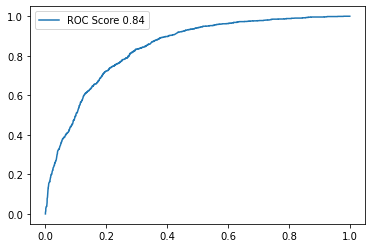

In [57]:
#### Sensitivity, specificity trade off
tpr, fpr,threshold = metrics.roc_curve(y_values["Actual"], y_values["prob"])
roc_score = round(metrics.roc_auc_score(y_values["Actual"], y_values["prob"]), 2)
plt.plot(tpr, fpr, label = "ROC Score {}".format(roc_score))
plt.legend(loc = 'best')
plt.show()

In [58]:
#### Finding optimal threshold
eval_matrix = pd.DataFrame( columns=["threshold", "sensi", "speci", "accu"])
print(eval_matrix)
index = 1
for i in range(0, 10):
    
    threshold = i/ 10
    y_train_pred = y_values.prob.apply(lambda x: 0 if x< threshold else 1) 
    confusion_matrix = metrics.confusion_matrix(y_values["Actual"], y_train_pred)
    
    ### calcualting the sensitivity and specificity of the model.
    sensitivity = confusion_matrix[1,1] / ( confusion_matrix[1,0] + confusion_matrix[1,1])
    specificity = confusion_matrix[0,0] / ( confusion_matrix[0,0] + confusion_matrix[0,1])
    
    ### Getting the acuuracy of the model
    accuracy = metrics.accuracy_score(y_values["Actual"], y_train_pred)
    
    
    index +=1 
    #df = pd.DataFrame(, index = 1)
    eval_matrix =eval_matrix.append({"threshold": threshold, "sensi": sensitivity, "speci":specificity, "accu":accuracy} , ignore_index = True)

Empty DataFrame
Columns: [threshold, sensi, speci, accu]
Index: []


In [59]:
eval_matrix

,threshold,sensi,speci,accu
0,0.0,1.000000,0.000000,0.261479
1,0.1,0.943279,0.494085,0.611540
2,0.2,0.854701,0.664649,0.714344
3,0.3,0.768454,0.754333,0.758025
4,0.4,0.667444,0.828061,0.786063
5,0.5,0.513598,0.895461,0.795612
6,0.6,0.345765,0.950757,0.792564
7,0.7,0.161616,0.986520,0.770825
8,0.8,0.025641,0.998900,0.744413
9,0.9,0.000000,1.000000,0.738521


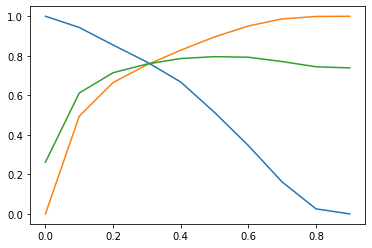

In [60]:
plt.plot(eval_matrix.threshold, eval_matrix.sensi, label = "Sensitivity")
plt.plot(eval_matrix.threshold, eval_matrix.speci, label = "Specificity")
plt.plot(eval_matrix.threshold, eval_matrix.accu, label = "Accuracy")
plt.show()

Around 0.3 we seem to find a balance between all the metrics.
Choosing 0.3 as the cutoff


In [61]:
### Making predictions on the test and train set.

y_train_pred = y_values.prob.apply(lambda x: 0 if x< 0.3 else 1) 
confusion_matrix = metrics.confusion_matrix(y_values["Actual"], y_train_pred)
    
### calcualting the sensitivity and specificity of the model.
sensitivity = confusion_matrix[1,1] / ( confusion_matrix[1,0] + confusion_matrix[1,1])
specificity = confusion_matrix[0,0] / ( confusion_matrix[0,0] + confusion_matrix[0,1])
    
### Getting the acuuracy of the model
accuracy = metrics.accuracy_score(y_values["Actual"], y_train_pred)

accuracy, sensitivity, specificity

(0.7580251930109712, 0.7684537684537684, 0.7543328748280606)

### Evaluating model performance on the test set

In [63]:
model_cols = X_train.columns
scaler.transform
y_test_preds = model_fit.predict(sm.add_constant(X_test[model_cols]))
y_test_pred = y_test_preds.apply(lambda x: 0 if x< 0.3 else 1) 

confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
    
### calcualting the sensitivity and specificity of the model.
sensitivity = confusion_matrix[1,1] / ( confusion_matrix[1,0] + confusion_matrix[1,1])
specificity = confusion_matrix[0,0] / ( confusion_matrix[0,0] + confusion_matrix[0,1])
    
### Getting the acuuracy of the model
accuracy = metrics.accuracy_score(y_values["Actual"], y_train_pred)

accuracy, sensitivity, specificity

(0.7580251930109712, 0.7491408934707904, 0.731675392670157)

### Conclusions: 

We could see that after changing the cut-off threshold, sensitivity of the model has improved.
We got a model with a decent performance.